In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
data_set = "C:\\Users\\deept\\Downloads\\diabetes.csv"
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(data_set, header=None, names=columns)

In [3]:
print("\nFirst 5 rows of the dataset:")
print(data.head())


First 5 rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI   
1            6      148             72             35        0  33.6   
2            1       85             66             29        0  26.6   
3            8      183             64              0        0  23.3   
4            1       89             66             23       94  28.1   

   DiabetesPedigreeFunction  Age  Outcome  
0  DiabetesPedigreeFunction  Age  Outcome  
1                     0.627   50        1  
2                     0.351   31        0  
3                     0.672   32        1  
4                     0.167   21        0  


In [4]:
print("\nSummary statistics:")
print(data.describe())


Summary statistics:
       Pregnancies Glucose BloodPressure SkinThickness Insulin  BMI  \
count          769     769           769           769     769  769   
unique          18     137            48            52     187  249   
top              1     100            70             0       0   32   
freq           135      17            57           227     374   13   

       DiabetesPedigreeFunction  Age Outcome  
count                       769  769     769  
unique                      518   53       3  
top                       0.254   22       0  
freq                          6   72     500  


In [5]:
print("\nCheck for missing values:")
print(data.isnull().sum())


Check for missing values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [6]:
categorical_cols = data.select_dtypes(include=['object']).columns
encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])
data = data.astype(float)


In [7]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['BloodPressure'] = encoder.fit_transform(data['BloodPressure'])
data['SkinThickness'] = encoder.fit_transform(data['SkinThickness'])

In [8]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
model = LogisticRegression(max_iter=200)

In [12]:
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=200)

In [13]:
y_pred = model.predict(X_test_scaled)


In [14]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.70      0.85      0.77       101
         1.0       0.52      0.30      0.38        53

    accuracy                           0.66       154
   macro avg       0.61      0.58      0.57       154
weighted avg       0.64      0.66      0.63       154



In [15]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[86 15]
 [37 16]]


In [16]:
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Accuracy Score:
0.6623376623376623


In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
cv_scores = cross_val_score(model, X_scaled, y, cv=5)
print("\nCross-Validation Scores: ", cv_scores)
print("Mean Cross-Validation Score: ", cv_scores.mean())

C:\Users\deept\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"



Cross-Validation Scores:  [0.68831169 0.7012987  0.65584416 0.72077922 0.69934641]
Mean Cross-Validation Score:  0.6931160342925049


In [20]:
print("\nModel Coefficients (weights):")
coefficients = pd.DataFrame(model.coef_, columns=X.columns)
print(coefficients)


Model Coefficients (weights):
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0    -0.283585 -0.059750      -0.093956      -0.272525 -0.085555 -0.587877   
1    -0.029037 -0.276399      -0.257919      -0.197234 -0.321760  0.189956   
2     0.312622  0.336150       0.351875       0.469759  0.407315  0.397921   

   DiabetesPedigreeFunction       Age  
0                 -0.347058 -0.531555  
1                  0.035720 -0.063369  
2                  0.311338  0.594924  


In [21]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_scaled)[:,1])
roc_auc = auc(fpr, tpr)

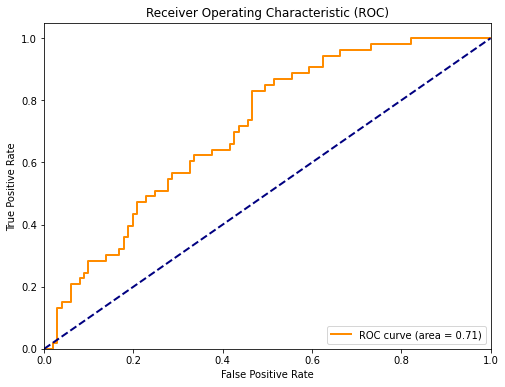

In [22]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()